# DINAV 2223 LAB
> __INTERAÇÃO:__ 2 \
> __DATA:__  16/03/2023



# IDENTIFICAÇÃO DO GRUPO
> __NÚMERO:__ 1190998  __NOME:__ Ricardo Macedo \
> __NÚMERO:__ 1170513  __NOME:__ João Pinto



# Bibliotecas usadas
Para esta iteração foram usadas as bibliotecas do matplotlib, tksheet, scipy e numpy. Foram instaladas todas usando o pip e o IDE usado foi o Visual Studio Code. Abaixo estão os comandos para a instalação de cada biblioteca 
(já automaticamente executados dentro do código caso não tenha instalada a mesma):

- pip install matplotlib

- pip install tksheet

- pip install scipy

- pip install numpy

- pip install pygame


# ANÁLISE CRÍTICA
> __Objetivos alcançados:__
Foi criada com sucesso uma interface para o input de dados e um interface tabular para o output de dados. \
Os objetivos iniciais de ser possivel demonstrar o manipulador na posição obtida e obter os dados relativos à posição final da sua extremidade foram concluidos com sucesso.\
> __O que está menos bem:__
Podia ter sido animado com alteração em tempo real das variaveis e consequente movimento reativo do manipulador. 

# COMO UTILIZAR: 
1- Inserir o tipo de dinâmica que se pretende usar, direta ou inversa.
2- Inserir os valores na caixa de texto com o prompt com os nomes dos valores associados: L1, L2, h, theta 1, theta 2 e theta 3 para cinemática direta e L1, L2, h, X, Y e Z para cinemática inversa. \
3- Clicar enter após cada input de valores. \
4- Observar a representação gráfica abaixo do código. \
5- Correr o código abaixo da representação para uma abrir a tabela com os valores obtidos e com os valores dados. \
6- Correr o código abaixo do da tabela para ver a vista lateral do braço robótico, onde a vermelho está o braço e a azul uma linha para visualizar o ângulo da junta.



# REFERENCIAS UTILIZADAS (LINKS)
> 1 -https://matplotlib.org \
> 2 -https://numpy.org \
> 3 -https://scipy.org \
> 4 -https://docs.python.org/3/library/math.html \
> 5 -https://stackoverflow.com \
> 6 -https://pypi.org/project/tksheet/4.7.6/ \


In [ ]:
import sys
!{sys.executable} -m pip install pygame
import pygame

# definir cores
preto = (0, 0, 0)
branco = (255, 255, 255)
verde = (0, 255, 0)
vermelho = (255, 0, 0)
azul = (0, 0, 255)

pygame.init()

# altura e largura do ecrã em pixeis
size = [1450, 700]
screen = pygame.display.set_mode(size)

pygame.display.set_caption("Considerações iniciais")

# continuar até ser carregado no butão de fechar
done = False

# tick rate do update do ecrã basicamente
clock = pygame.time.Clock()

# definir o tamanho da font a ser aplicada
font = pygame.font.Font(None, 25)
font2 = pygame.font.Font(None, 30)
font1 = pygame.font.Font(None, 35)
# condições iniciais de funcionamento (dar display das instruções e a página ser a 1 )
instruction_page = 1

# -------- Instruction Page Loop -----------
while not done:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            done = True
        # avançar a página
        if event.type == pygame.MOUSEBUTTONDOWN:
            instruction_page += 1

    # background do ecrã
    screen.fill(branco)

# desenhar a página 1
    if instruction_page == 1:
        text = font2.render("Considerações iniciais", True, preto)
        screen.blit(text, [10, 10])
        text = font.render("1- A largura atribuida ao L1 vai determinar os tamanhos possiveis de L2 \
sendo que L2 só pode ser 1/3 ou 3 vezes o valor de L1 e a altura 3/2 ou 2/3 do maior dos dois. ", True, preto)
        screen.blit(text, [10, 50])
        text = font.render(
            "Os valores serão limitados mesmo sem o consentimento do utilizador caso passe os limites de L2,", True, preto)
        screen.blit(text, [10, 80])
        text = font.render(
            "ao mesmo será atribuido o valor do limite inferior ou superior respetivamente.", True, preto)
        screen.blit(text, [10, 110])
        text = font.render(
            "O procedimento acima apresentado também será aplicado à altura, que terá o valor entre 0.5 e 1.5 vezes o valor da média de L1 e L2.", True, preto)
        screen.blit(text, [10, 140])
        text = font.render(
            "(Esta regra surge no contexto de evitar representações 'absurdas' onde L1 e L2 têm várias ordens de grandeza de diferença)", True, preto)
        screen.blit(text, [10, 170])
        ########################################## Regra 2##############################################
        text = font.render(
            "2- Os valores dos angulos atribuidos a cada eixo na abordagem direta são limitados por uma questão de realismo  ", True, preto)
        screen.blit(text, [10, 240])
        text = font.render(
            "Theta 2 limitado entre -80 a 260 graus e Theta 3 limitado entre -160 a 160 graus de modo a não se sobreporem um ao outro e à base.", True, preto)
        screen.blit(text, [10, 270])
        text = font.render(
            "Mais uma vez a autonomia do utilizador foi retirada mas os valores dados ainda serão considerados de modo a encontrar o caso que mais se aproxima ao pedido.", True, preto)
        screen.blit(text, [10, 300])
        text = font.render(
            "3- O x y e z na abordagem inversa, quando impossiveis, poderam ser limitados caso a vontade do utilizador baseado no tamanho de L1 e L2 ajustados com fatores calculados ", True, preto)
        screen.blit(text, [10, 370])
        text = font.render(
            "entre x y e z de modo a adaptar quaisquer valores de coordenada dados ao tamanho dos eixos reais refletidos na tabela final (terceiro código) ou então introduzir novos valores.", True, preto)
        screen.blit(text, [10, 400])
        text = font.render(
            "Esta regra surge no contexto de impedir com que coordenadas impossiveis, tendo em conta tamanhos de L1 e L2, afetem a representação do manipulador.", True, preto)
        screen.blit(text, [10, 430])
        text = font.render(
            "4- Relativamente à escolha entre upper e lower elbow, a escolha é total do utilizador mas caso se verifique que algo além  ", True, preto)
        screen.blit(text, [10, 500])
        text = font.render(
            "de 'up' ou 'low' é digitado será automaticamente escolhido o modo upper-elbow. ", True, preto)
        screen.blit(text, [10, 520])
        text = font1.render(
            "!!VALORES 'ABSURDOS' SERÃO AUTOMATICAMENTE CORRIGIDOS MAS FAVOR EVITAR QUANDO POSSÍVEL !!", True, preto)
        screen.blit(text, [10, 580])

        text = font.render("Página 1/3", True, preto)
        screen.blit(text, [10, 680])
# desenhar a página 2
    if instruction_page == 2:
        text = font1.render("Uso e funcionalidade das funções", True, preto)
        screen.blit(text, [10, 10])
        text = font.render(
            "1- Função das instruções: serve para dar um insight quanto à potencialidade do programa e as regras por detrás das variáveis.", True, preto)
        screen.blit(text, [10, 40])
        text = font.render(
            "2- Função principal na medida em que quando corrida é perguntado ao utilizador os parâmetros que o mesmo quer utilizar", True, preto)
        screen.blit(text, [10, 120])
        text = font.render(
            ", seguido da cinemática e caso inversa upper ou lower elbow, procedendo á validação e limitação dos valores dados e posterior representação gráfica.", True, preto)
        screen.blit(text, [10, 150])
        text = font.render(
            "Contando com 3 cilindros (preto: base, amarelo: L1, vermelho:L2) e 2 juntas (ponto base e ponto médio) e um cone de extremidade com coordenadas [xf,yf,zf]", True, preto)
        screen.blit(text, [10, 180])
        text = font.render(
            "3- Função de funcionalidade tabelar para expor de uma maneira mais legivel e conveniente os valores dados e os valores obtidos pela função principal.", True, preto)
        screen.blit(text, [10, 260])
        text = font.render(
            "4- Representação gráfica 2D que facilita a visualização dos ângulos das juntas e identifica os eixos, não incluída na representação 3D pelo detrimento na clareza visual.", True, preto)
        screen.blit(text, [10, 340])
        text = font.render("Página 2/3", True, preto)
        screen.blit(text, [10, 680])
    if instruction_page == 3:
        text = font.render("", True, preto)
        screen.blit(text, [10, 10])
        text = font.render("Work in progress...", True, preto)
        screen.blit(text, [10, 40])
        text = font.render("Página 3/3", True, preto)
        screen.blit(text, [10, 680])
    if instruction_page == 4:
        instruction_page = 1
    # Limitar para 60 frames
    clock.tick(60)
    pygame.display.flip()

pygame.quit()


In [ ]:

%matplotlib widget 
# instalar pacotes senão estiverem já presentes 


try:
    import matplotlib.pyplot as plt
    import numpy as np
    import math
except:
    !{sys.executable} -m pip install matplotlib
    !{sys.executable} -m pip install numpy
    !{sys.executable} -m pip install math
try: 
    import tkinter as tk
    import tksheet
except:
    !{sys.executable} -m pip install tk
    !{sys.executable} -m pip install tksheet
from math import sin, cos, tan , pi 

try:
    from scipy.linalg import norm
except:
    !{sys.executable} -m pip install scipy
from matplotlib import cm

# função para limitar variaveis com valores de máximo e minimo fixos 
def limit(n, minim, maxn):
    return max(min(maxn, n), minim)
#Definição das variaveis que vão ser partilhadas entre funções
class Globals():
        def __init__(self):

            self.l1 = 0.0 #comprimento de l1
            self.l2 = 0.0 #comprimento de l2
            self.h = 0.0 #altura
            self.tet1 = 0.0 #tetha 1
            self.tet2= 0.0 #tetha 2 
            self.tet3 = 0.0 #tetha 3
           
            self.tet1d = 0.0 #tetha 1 elbow down
            self.tet3d = 0.0 #tetha 3 elbow down

            self.xf = 0.0 # x final
            self.yf = 0.0 # y final
            self.zf = 0.0 # z final
            self.xc = 0.0  # x base cone
            self.yc = 0.0 # y base cone
            self.zc = 0.0 # z base cone
            self.xm = 0.0 # x intermédio
            self.ym = 0.0 # y intermédio
            self.zm = 0.0 # z intermédio

            self.xmd = 0.0 # x intermédio elbow down
            self.ymd = 0.0 # y intermédio elbow down
            self.zmd = 0.0 # z intermédio elbow down

            self.cinematica = 0.0 # cinematica direta ou inversa
            self.type_elbow = 0.0 # upper ou lower elbow
            self.D = 0.0 # cosseno teta 3 
            
            self.n = 0 

G = Globals()

def inp():
    G.cinematica = input("Introduza a cinemática pretendida, direta (d) ou inversa (i):")
    G.cinematica.strip()#retirar os espaços da string para nao haver erros devido a input mal inserido
    #Ciclo para verificar a boa inserção da string 
    while G.cinematica not in ['i','d','direta','inversa']:  
        G.cinematica = input("Valor errado, introduza a cinemática pretendida, direta (d) ou inversa (i):")
    # pedir o valor de cada uma das variaveis necessárias para os cálculos
    G.l1 = float(input("Insira o valor de L1 (m):"))
    G.l1 = limit(G.l1,0.1, 1000) # limitação do L1 
    G.l2 = float(input("Insira o valor de  L2 (m):"))
    G.l2 = limit(G.l2,G.l1/3, G.l1*3) # Limitação do L2 
    G.h = float(input("Insira o valor da altura (m):"))
    G.h = limit(G.h,(G.l1+G.l2/2)*0.5,((G.l1+G.l2)/2)*1.5 ) # limitação do L3 para mais informações ler as instruções 

def inpp():
    if(G.cinematica in ['i','inversa']):
        G.xf = float(input("Insira o valor da coordenada x em metros:"))
        
        G.yf = float(input("Insira o valor da coordenada y em metros:"))
        
        G.zf = float(input("Insira o valor da coordenada z em metros:"))
        
        # fator de ajuste escalando o x y z para valores nas ordens do L1 e L2 
        fatf=(G.l1+G.l2)/((G.xf**2+G.yf**2+G.zf**2)**(1/2))
                #Calculo do D aka cos de teta 3     
        G.D = (((G.xf**2)+(G.yf**2)+((G.zf - G.h)**2) - G.l1**2 - G.l2**2)/(2*G.l1*G.l2))
        # match case para escolha do utilizador entre valores ajustados ou inserir novos valores, \ 
        # ter em conta que basta um dos valores de coordenadas estar fora de limite que a escala será aplicada a todos por igual 
        if (-1<=G.D<=1):
            print("all ok!!")
        else:
            ajus = input("Coordenadas fora dos limites, digite 'new' para inserir novas coordenadas ou 'auto' para a função de auto-ajuste baseado nos limites implementados (L1 e L2), qualquer outro valor será tomado \
                como o caso de 'new'.")
            match ajus:
                case 'new':
                    inpp()
                case 'auto':
                    G.xf*=fatf
                    G.yf*=fatf
                    G.zf*=fatf
                    G.D = (((G.xf**2)+(G.yf**2)+((G.zf - G.h)**2) - G.l1**2 - G.l2**2)/(2*G.l1*G.l2))
                case _:
                    inpp()
                    

    else:
        G.tet1 = float(input("Insira o valor de theta 1 em graus:"))
        G.tet2 = float(input("Insira o valor de theta 2 em graus:"))
        G.tet2 = limit(G.tet2,-80,260) # limitação de teta 2 entre -80 e 260 graus
        G.tet3 = float(input("Insira o valores de theta 3 em graus:"))
        G.tet3 = limit(G.tet3,-160, 160)
#O que é cada fila na cinematica direta
talk= ['Val.L1, L2, h. (m)','Val.T1, T2, T3 (°)',' ',' ','Coord. extrem. (m)','Coord. 2ª junta (m)', 'Coord. base (m)'] #direta
#O que é cada fila na cinematica inversa
talki = ['Val.L1, L2, h. (m)','Coord. extrem. (m)',' ','Val.T1, T2, T3 (°)',' ',' ','Coord. segunda junta (m)', 'Coord. base (m)'] #inversa
# nome das colunas
cord= ['x','y','z'] 

def calc():
    
    if(G.cinematica in ['d','direta']):
        rad1 = math.radians(G.tet1)
        rad2 = math.radians(G.tet2)
        rad3 = math.radians(G.tet3)
        # Coordenadas da extremidade final
        G.xf = (G.l1 * math.cos(rad2) + G.l2*math.cos(rad2 + rad3)) * math.cos(rad1)
        G.zf = G.l1 * math.sin(rad2) + G.l2*math.sin(rad2 + rad3) + G.h
        G.yf = (G.l1 * math.cos(rad2) + G.l2*math.cos(rad2 + rad3)) * math.sin(rad1)
    if(G.cinematica in ['i','inversa']):  
        # confirmar que temos um D válido que se for maior que 1 ou menor que -1 não é possivel
        while(not (-1<=G.D<=1)):
            print("Coordenadas impossiveis insira novas:")
            inpp()
        # pedir ao utilizador se ele quer upper ou lower elbow 
        elbow= input("Digite up para upper elbow e low para lower elbow para preferência de representação")
        elbow.strip()# retirar os espaços da string para nao haver erros devido a input mal inserido
        # match da variavel digitada elbow de modo a selcionar o modo de cálculo e representação a ser usado 
        match elbow:
            case 'up': 
                G.tet3 = math.degrees(math.atan2(math.sqrt((1-(G.D)**2)), G.D))
            case 'low':
                G.tet3 = math.degrees(math.atan2(-math.sqrt((1-(G.D)**2)), G.D))
            case _:
                print("Como foi digitado um valor errado será escolhido por default a configuração upper elbow")
                G.tet3 = math.degrees(math.atan2(math.sqrt((1-(G.D)**2)), G.D))
                
        
        G.tet1 = math.degrees(math.atan2(G.yf,G.xf))

        G.tet3 = limit(G.tet3, -160, 160)
        G.tet2 = math.degrees(math.atan2((G.zf- G.h), math.sqrt(G.xf**2 + G.yf**2)) - math.atan2(G.l2*math.sin(math.radians(G.tet3)), G.l1 + G.l2*math.cos(math.radians(G.tet3))))
        if (-80<=G.tet2<=260):
            rad1 = math.radians(G.tet1)
            rad2 = math.radians(G.tet2)
            rad3 = math.radians(G.tet3)
        #Coordenadas da junta entre os dois L elbow down
            G.xmd = (G.l1 * math.cos(rad2)) * math.cos(rad1)
            G.zmd = (G.l1 * math.sin(rad2)) + G.h
            G.ymd = (G.l1 * math.cos(rad2)) * math.sin(rad1)
        else:
            print("As coordenadas inseridas não são possíveis insira novas:")
            inpp()


    #Coordenadas da base do cone na ponta da extremidade
    G.xc = (G.l1 * math.cos(rad2) + (G.l2*0.7)*math.cos(rad2 + rad3)) * math.cos(rad1)
    G.zc = G.l1 * math.sin(rad2) + (G.l2*0.7)*math.sin(rad2 + rad3) + G.h
    G.yc = (G.l1 * math.cos(rad2) + (G.l2*0.7)*math.cos(rad2 + rad3)) * math.sin(rad1)

    #Coordenadas da junta entre os dois L
    G.xm = (G.l1 * math.cos(rad2)) * math.cos(rad1)
    G.zm = (G.l1 * math.sin(rad2)) + G.h
    G.ym = (G.l1 * math.cos(rad2)) * math.sin(rad1)

    # Limitação dos valores até 10 algarismos significativos 
    G.xf = round(G.xf , 10 )
    G.yf = round(G.yf , 10 )
    G.zf = round(G.zf , 10 )
    G.xm = round(G.xm , 10 )
    G.ym = round(G.ym , 10 )
    G.zm = round(G.zm , 10 )
    #Print das coordenadas dos pontos descritos (Extremidade e junta no meio)
    print("Coordenadas da extremidade do braço (m): ", G.xf, G.yf, G.zf)
    print("Coordenadas da segunda junta (m): ", G.xm, G.ym, G.zm)
    
    
# Função de desenho das peças (cilindros) e das juntas (esferas)
def drow():
    # os centros das duas esferas (juntas)
    center = np.array([[0, 0, G.h],[G.xm, G.ym, G.zm]])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #eixos e raios
    p0 = np.array([[0,0,0],[0, 0, G.h], [G.xm, G.ym, G.zm]])
    p1 = np.array([[0, 0, G.h],[G.xm, G.ym, G.zm],[G.xc, G.yc, G.zc]])
    pc0 = np.array([G.xc, G.yc, G.zc])
    pc1 = np.array([G.xf, G.yf, G.zf])
    R = [G.h*0.1666,G.l1*0.75*0.1666 , G.l2*0.75*0.1666 ] #raio dos cilindros face á sua altura
    col= ['black','yellow','red'] #cor de cada um dos cilindros
    # vector in direction of axis
    for i in range(3):
        ########################################################### CILINDRO############################
        # vetor de p0 a p1 
        v = p1[i] - p0[i]
        # magnitude do vetor
        mag = norm(v)
        # vetor unitário na direção do eixo
        v = v / mag
        # criar um vetor que não seja na mesma direção que v
        not_v = np.array([1, 0, 0])
        if (v == not_v).all():
            not_v = np.array([0, 1, 0])
        # criar  um vetor perpendicualr a v
        n1 = np.cross(v, not_v)
        # normalizar n1
        n1 /= norm(n1)
        # fazer o vetor unitário perpendicular a v e n1
        n2 = np.cross(v, n1)
        # tamanho das superficies sobre te de 0 até o tamanho do eixo e de 0 até 2*pi
        t = np.linspace(0, mag, 100)
        theta = np.linspace(0, 2 * np.pi, 100)
        # uma meshgrid para fazer um array 2D
        t, theta = np.meshgrid(t, theta)
        # gerar as coordenadas da superficie
        X, Y, Z = [p0[i][j] + v[j] * t + R[i] *
        np.sin(theta) * n1[j] + R[i] * np.cos(theta) * n2[j] for j in [0, 1, 2]]
        ax.plot_surface(X, Y, Z, color=col[i])

        ########################################################### ESFERA ############################
        if ( i < 2 ):
        # equação da esfera 
            u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
            x = center[i][0] + (np.cos(u)*np.sin(v))*1.33*R[i+1]
            y = center[i][1] +(np.sin(u)*np.sin(v))*1.33*R[i+1]
            z = center[i][2] + np.cos(v)*1.33*R[i+1]
        #plot plot plot
            ax.plot_surface(x, y, z, color='orange')
        else:
            ########################################################### CONE ############################
            # cone = cilindo com bases diferentes na base e topo então copiou-se o código para o desenho
            
            R0 = 1.5*R[i] #raio da base do cone 
            R1 = 0.0000001 # raio do topo do cone
            # vetor de p0 a p1 
            ve = pc1 - pc0
            # magnitude do vetor
            magn = norm(ve)
            # vetor unitário na direção do eixo
            ve = ve / magn
            # criar um vetor que não seja na mesma direção que v
            not_ve = np.array([1, 1, 0])
            if (ve == not_ve).all():
                not_ve = np.array([0, 1, 0])
            # criar um vetor perpendicualr a v
            nc1 = np.cross(ve, not_ve)
            # normalizar n1 e caso a norma dê 0 (ambas juntas têm 0 de ângulo) a norma é 1
            if norm(nc1) == 0:
                nc1 = 1
            else:
                nc1 /= norm(nc1)
            # fazer o vetor unitário perpendicular a v e n1
            nc2 = np.cross(ve, nc1)
            # tamanho das superficies sobre te de 0 até o tamanho do eixo e de 0 até 2*pi
            nini= 100
            te = np.linspace(0, magn, nini)
            the = np.linspace(0, 2 * np.pi, nini)
            # uma meshgrid para fazer um array 2D
            te, the = np.meshgrid(te, the)
            Rc= np.linspace(R0, R1, nini)
            # gerar as coordenadas da superficie
            xi, yi, zi = [pc0[j] + ve[j] * te + Rc *
                    np.sin(theta) * nc1[j] + Rc * np.cos(theta) * nc2[j] for j in [0, 1, 2]]
            ax.plot_surface(xi, yi, zi, cmap= cm.coolwarm, alpha = 1)
            
        # ax.plot_surface(X, Y, Z, color='red')
        # plot plot plot
        ax.plot(*zip(p0[i], p1[i]), color='red')
        
    #LABELS LABELS LABELS e titulo 
    plt.title('Representação num espaço 3D do braço robótico')
    ax.set_xlabel('X axis (m)') 
    ax.set_ylabel('Y axis (m)') 
    ax.set_zlabel('Z axis (m)')
    # Mais limites para assegurar uma boa representação do modelo baseado em L1 e L2
    ax.set_xlim(-(G.l1+G.l2*2 ), (G.l1+G.l2*2 ))
    ax.set_ylim(-(G.l1+G.l2*2 ), (G.l1+G.l2*2 ))
    plt.show()


inp()
inpp()

calc()
drow()



In [ ]:

top = tk.Tk()



sheet = tksheet.Sheet(top)


# definição da tabela
sheet.grid(sticky = "nswe", padx = 10, pady = 10)
# estética 
sheet.change_theme("dark")
# plot do header
sheet.headers((f"{cord[c]}" for c in range(len(cord))))
#"plot" dos indices

# esconder os headers ( decisão estratégica)
sheet.hide("header")
# os dados a ser mostrados na tabela
if G.cinematica in ['inversa','i']:
    sheet.row_index((f"{talki[r]}" for r in range(len(talki))))
    sheet.set_sheet_data([[G.l1, G.l2, G.h],[G.xf, G.yf, G.zf],[' ', ' ', ' '],[G.tet1, G.tet2, G.tet3],[' ', ' ', ' '],['x', 'y', 'z'], [G.xm, G.ym, G.zm],[0, 0, G.h]])
else: 
    sheet.row_index((f"{talk[r]}" for r in range(len(talk))))
    sheet.set_sheet_data([[G.l1, G.l2, G.h],[G.tet1, G.tet2, G.tet3],[' ', ' ', ' '],['x', 'y', 'z'],[G.xf, G.yf, G.zf], [G.xm, G.ym, G.zm],[0, 0, G.h]])

# opções de customização da tabela
sheet.enable_bindings(("single_select", "row_select", "column_width_resize", "arrowkeys", "right_click_popup_menu", "rc_select", "rc_insert_row", "rc_delete_row","copy", "cut", "paste", "delete", "undo", "edit_cell"))

top.mainloop()


In [ ]:
#Codigo para representar o manipulador visto lateralmente
fig, ax = plt.subplots()

plt.title('Vista lateral do Manipulador')
plt.xlabel('X axis (m)') 
plt.ylabel('Z axis (m)') 
#pontos para desenhar o manipulador
p0 = np.array([[0, 0],[0, G.h], [G.xm, G.zm],[G.xf, G.zf]])

vec = p0[2]+(p0[2]-p0[1])*0.3
vec2 = p0[1] + (p0[2]-p0[1])* 0.5
#pontos para representar os ângulos das juntas
p2 = np.array([[0, G.h],[G.xm, G.zm]])
p3 = np.array([[G.l1*0.2, G.h],vec])

tet3= str(round(G.tet3,3))+'º' # passar de float para string para escrever como texto na plot 
tet2 = str(round(G.tet2,3))+'º'
ax.text(0, G.h, tet2, fontsize = 10)
ax.text(G.xm, G.zm, tet3, fontsize = 10)
ax.text(vec2[0], vec2[1], 'L1', fontsize = 7)
ax.text(G.xc, G.zc, 'L2', fontsize = 7)
#Desenho do manipulador
for i in range(3):
    ax.plot(*zip(p0[i], p0[i+1]), color='red')
for i in range(2):
        ax.plot(*zip(p2[i], p3[i]), color='blue')
    
ax.set_xlim(-(G.l1+G.l2*2 ), (G.l1+G.l2*2 ))
ax.set_ylim(-(G.l1+G.l2*2 ), (G.l1+G.l2*2 ))
plt.show()


C:\Users\joaop\AppData\Local\Temp\ipykernel_13856\3050343463.py:1089: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot( t1, mov1_t1, 'k:', color='red', label="Posição") # linha pontilha orange
C:\Users\joaop\AppData\Local\Temp\ipykernel_13856\3050343463.py:1092: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot( t1, vel1_t1, 'k:', color='blue', label="Velocidade") # linha pontilha orange
C:\Users\joaop\AppData\Local\Temp\ipykernel_13856\3050343463.py:1095: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot( t1, acl1_t1, 'k:', color='green', label="Aceleração") # linha pontilha orange
C:\Users\joaop\AppData\Local\Temp\ipykernel_13856\30503

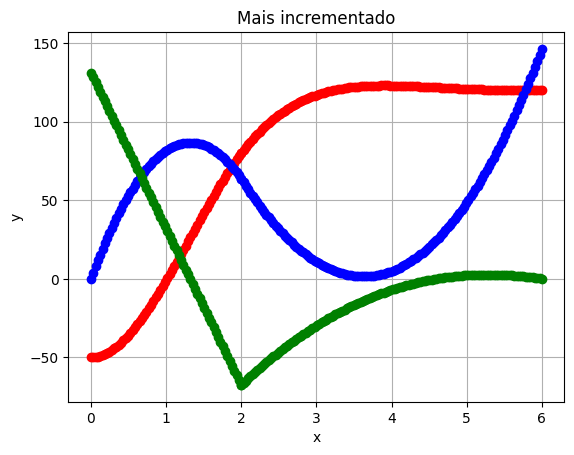

In [4]:
# TRABALHO 
# DINAV 2021 
# INTERAÇÃO 2 #
# DATA:7/11/2021  

# IDENTIFICAÇÃO
# NÚMERO:1180685
# NOME:João Vieira


# REALIZAÇÃO
# (3) Parilhada 
#  com João Santos, 1181018

#COMO UTILIZAR O CÓDIGO
# Caso não tenha a biblioteca do Tkinter abrir o anaconda prompt e digitar o codigo conda install -c anaconda tk
# Não existe limite no tamanhos do elos, só não podem ser negativos.
# O robô fica na posição inicial(thetas=45°) se não conseguir alacançar as coordenadas inseridas pelo o utilizador, a psoição inicial é configurável pelo programador. 
# Método de utilização:
#    1º- Executar o programa, que vai abrir a interface dos dados dos utilizadores;
#    2ª- essa interface o uilizador define os comprimentos dos elos (só é aceite valores positivos) 
#        e as coordenadas da extermidade do robô;
#    3ª- Depois de preencher com os dados corretos, caso se introduzam dados não possiveis, ao clicar num dos botões 
#        o programa avisa que algo está errado;
#    4ª- Com os dados todos corretos e depois de se clicar no botão, vai abrir uma nova janela com o gráfico 
#        da projeção 3D do robô  e retorna os ângulos de cada junta do robô.
#

#ANÁLISE CRÍTICA
#Objetivos alcançados:
#Todos os objetivos alcançados.
#
#O que está menos bem:
#O codigo permite intersecões dos elos.
#

# Fontes:https://www.devmedia.com.br/tkinter-interfaces-graficas-em-python/33956
#        https://anaconda.org/anaconda/tk
#        https://likegeeks.com/3d-plotting-in-python/


from tkinter import *
class Application:
    def __init__(self, master=None):
        
        self.fontePadrao = ("Arial", "10")
        self.primeiroContainer = Frame(master)
        self.primeiroContainer["pady"] = 10
        self.primeiroContainer.pack()

        self.tituloContainer = Frame(master)
        self.tituloContainer["padx"] = 20
        self.tituloContainer.pack()
        
        self.segundoContainer = Frame(master)
        self.segundoContainer["padx"] = 20
        self.segundoContainer.pack()
        
        self.titulo2Container = Frame(master)
        self.titulo2Container["padx"] = 20
        self.titulo2Container.pack()

        self.terceiroContainer = Frame(master)
        self.terceiroContainer["padx"] = 20
        self.terceiroContainer.pack()
        
        self.titulo3Container = Frame(master)
        self.titulo3Container["padx"] = 20
        self.titulo3Container.pack()
        
        self.pontointContainer = Frame(master)
        self.pontointContainer["padx"] = 20
        self.pontointContainer.pack()
        
        self.titulo4Container = Frame(master)
        self.titulo4Container["padx"] = 20
        self.titulo4Container.pack()
        
        self.pontofContainer = Frame(master)
        self.pontofContainer["padx"] = 20
        self.pontofContainer.pack()
        
        self.titulo5Container = Frame(master)
        self.titulo5Container["padx"] = 20
        self.titulo5Container.pack()
        
        self.tempofinalContainer = Frame(master)
        self.tempofinalContainer["padx"] = 20
        self.tempofinalContainer.pack()

        self.quartoContainer = Frame(master)
        self.quartoContainer["pady"] = 10
        self.quartoContainer.pack()
        
        self.quintoContainer = Frame(master)
        self.quintoContainer["padx"] = 20
        self.quintoContainer.pack()
        
        self.sextoContainer = Frame(master)
        self.sextoContainer["pady"] = 10
        self.sextoContainer.pack()
        
        self.setimoContainer = Frame(master)
        self.setimoContainer["padx"] = 20
        self.setimoContainer.pack()
        
        self.oitavoContainer = Frame(master)
        self.oitavoContainer["pady"] = 5
        self.oitavoContainer.pack()
        
        self.nonoContainer = Frame(master)
        self.nonoContainer["pady"] = 5
        self.nonoContainer.pack()

        self.titulo = Label(self.primeiroContainer, text="Dados do utilizador")
        self.titulo["font"] = ("Arial", "15", "bold")
        self.titulo.pack()
        
        self.titulo1 = Label(self.tituloContainer, text="Comprimentos do elos")
        self.titulo1["font"] = ("Arial", "10", "bold")
        self.titulo1.pack()

        self.hLabel = Label(self.segundoContainer,text="Elo 1(m)", font=self.fontePadrao)
        self.hLabel.pack(side=LEFT)
        
        self.h= Entry(self.segundoContainer)
        self.h["width"] = 10
        self.h["font"] = self.fontePadrao
        self.h.pack(side=LEFT)

        self.L1Label = Label(self.segundoContainer,text="Elo 2(m)", font=self.fontePadrao)
        self.L1Label.pack(side=LEFT)

        self.L1 = Entry(self.segundoContainer)
        self.L1["width"] = 10
        self.L1["font"] = self.fontePadrao
        self.L1.pack(side=LEFT)

        self.L2Label = Label(self.segundoContainer,text="Elo 3(m)", font=self.fontePadrao)
        self.L2Label.pack(side=LEFT)
        
        self.L2 = Entry(self.segundoContainer)
        self.L2["width"] = 10
        self.L2["font"] = self.fontePadrao
        self.L2.pack(side=LEFT)
    
        self.titulo2 = Label(self.titulo2Container, text="Coordenadas da extermidade do robô:\nPonto inicial (P1): ")
        self.titulo2["font"] = ("Arial", "10", "bold")
        self.titulo2.pack()
        
        self.xiLabel = Label(self.terceiroContainer, text="X1(m)", font=self.fontePadrao)
        self.xiLabel.pack(side=LEFT)

        self.xi = Entry(self.terceiroContainer)
        self.xi["width"] = 10
        self.xi["font"] = self.fontePadrao
        self.xi.pack(side=LEFT)
        
        self.yiLabel = Label(self.terceiroContainer, text="Y1(m)", font=self.fontePadrao)
        self.yiLabel.pack(side=LEFT)

        self.yi = Entry(self.terceiroContainer)
        self.yi["width"] = 10
        self.yi["font"] = self.fontePadrao
        self.yi.pack(side=LEFT)
        
        self.ziLabel = Label(self.terceiroContainer, text="Z1(m)", font=self.fontePadrao)
        self.ziLabel.pack(side=LEFT)

        self.zi = Entry(self.terceiroContainer)
        self.zi["width"] = 10
        self.zi["font"] = self.fontePadrao
        self.zi.pack(side=LEFT)
        
        self.titulo3 = Label(self.titulo3Container, text="Ponto intermédio (P2): ")
        self.titulo3["font"] = ("Arial", "10", "bold")
        self.titulo3.pack()
        
        self.xintLabel = Label(self.pontointContainer, text="X2(m)", font=self.fontePadrao)
        self.xintLabel.pack(side=LEFT)

        self.xint = Entry(self.pontointContainer)
        self.xint["width"] = 10
        self.xint["font"] = self.fontePadrao
        self.xint.pack(side=LEFT)
        
        self.yintLabel = Label(self.pontointContainer, text="Y2(m)", font=self.fontePadrao)
        self.yintLabel.pack(side=LEFT)

        self.yint = Entry(self.pontointContainer)
        self.yint["width"] = 10
        self.yint["font"] = self.fontePadrao
        self.yint.pack(side=LEFT)
        
        self.zintLabel = Label(self.pontointContainer, text="Z2(m)", font=self.fontePadrao)
        self.zintLabel.pack(side=LEFT)

        self.zint = Entry(self.pontointContainer)
        self.zint["width"] = 10
        self.zint["font"] = self.fontePadrao
        self.zint.pack(side=LEFT)
        
        self.titulo4 = Label(self.titulo4Container, text="Ponto final (P3): ")
        self.titulo4["font"] = ("Arial", "10", "bold")
        self.titulo4.pack()
        
        self.xfLabel = Label(self.pontofContainer, text="X3(m)", font=self.fontePadrao)
        self.xfLabel.pack(side=LEFT)

        self.xf = Entry(self.pontofContainer)
        self.xf["width"] = 10
        self.xf["font"] = self.fontePadrao
        self.xf.pack(side=LEFT)
        
        self.yfLabel = Label(self.pontofContainer, text="Y3(m)", font=self.fontePadrao)
        self.yfLabel.pack(side=LEFT)

        self.yf = Entry(self.pontofContainer)
        self.yf["width"] = 10
        self.yf["font"] = self.fontePadrao
        self.yf.pack(side=LEFT)
        
        self.zfLabel = Label(self.pontofContainer, text="Z3(m)", font=self.fontePadrao)
        self.zfLabel.pack(side=LEFT)

        self.zf = Entry(self.pontofContainer)
        self.zf["width"] = 10
        self.zf["font"] = self.fontePadrao
        self.zf.pack(side=LEFT)
        
        self.titulo5 = Label(self.titulo5Container, text="Tempos, em segundos, para o robô percorrer as trajetórias:\n")
        self.titulo5["font"] = ("Arial", "10", "bold")
        self.titulo5.pack()
        
        self.tf1Label = Label(self.tempofinalContainer, text="t1=0 \t t2(P1 a P2) ", font=self.fontePadrao)
        self.tf1Label.pack(side=LEFT)

        self.tf1 = Entry(self.tempofinalContainer)
        self.tf1["width"] = 10
        self.tf1["font"] = self.fontePadrao
        self.tf1.pack(side=LEFT)
        
        self.tf2Label = Label(self.tempofinalContainer, text="\t t3(P2 a P3)", font=self.fontePadrao)
        self.tf2Label.pack(side=LEFT)

        self.tf2 = Entry(self.tempofinalContainer)
        self.tf2["width"] = 10
        self.tf2["font"] = self.fontePadrao
        self.tf2.pack(side=LEFT)
        
        self.hLabel = Label(self.quartoContainer,text="Partindo dos dados a cima analisa-se 4 soluçoes possiveis para o robot \n (atravez das relações elementares da trigonometria):")
        self.hLabel["font"] = ("Arial", "10", "bold")
        self.hLabel.pack(side=LEFT)
        
        self.TD = Button(self.quintoContainer)
        self.TD["text"] = "4 solucões"
        self.TD["font"] = ("Calibri", "8")
        self.TD["width"] = 15
        self.TD["command"] = self.calc_trajetoria
        self.TD.pack()
        
        self.hLabel = Label(self.sextoContainer,text="Cada solução com os gráficos XYZ, XY, XZ, YZ: ", font=self.fontePadrao)
        self.hLabel.pack(side=LEFT)
        
        self.SOL1 = Button(self.setimoContainer)
        self.SOL1["text"] = "int 3 grau"
        self.SOL1["font"] = ("Calibri", "8")
        self.SOL1["width"] = 10
        self.SOL1["command"] = self.interpolação_3grau 
        self.SOL1.pack(side=LEFT)
        
        self.SOL2 = Button(self.setimoContainer)
        self.SOL2["text"] = "int 5 grau"
        self.SOL2["font"] = ("Calibri", "8")
        self.SOL2["width"] = 10
        self.SOL2["command"] = self.interpolação_5grau
        self.SOL2.pack(side=LEFT)
        
        self.SOL3 = Button(self.oitavoContainer)
        self.SOL3["text"] = "3 solução"
        self.SOL3["font"] = ("Calibri", "8")
        self.SOL3["width"] = 10
        self.SOL3["command"] = self.solução_3
        self.SOL3.pack(side=LEFT)
        
        self.SOL4 = Button(self.oitavoContainer)
        self.SOL4["text"] = "4 solução"
        self.SOL4["font"] = ("Calibri", "8")
        self.SOL4["width"] = 10
        self.SOL4["command"] = self.solução_4
        self.SOL4.pack(side=LEFT)
        
        self.mensagem = Label(self.nonoContainer, text="", font=self.fontePadrao)
        self.mensagem["fg"]="red"
        self.mensagem.pack()
           
    def calc_coordenadas(self, O1, O2, O3, d1, a2, a3): #calculo das coordenadas das juntas (cinematica direta)
        import numpy as np
  
        cos=np.cos
        sin=np.sin
        
        # Convenção de Denavit-Hartenberg
        #matrizes de transformação homogéneas para cada uma das 3 juntas
        A1 = np.array([[cos(O1), 0, sin(O1), 0], [sin(O1), 0, -cos(O1), 0], [0, 1, 0, d1], [0, 0, 0, 1]])
        A2 = np.array([[cos(O2), -sin(O2), 0, a2*cos(O2)], [sin(O2), cos(O2), 0, a2*sin(O2)], [0, 0, 1, 0], [0, 0, 0, 1]])
        A3 = np.array([[cos(O3), -sin(O3), 0, a3*cos(O3)], [sin(O3), cos(O3), 0, a3*sin(O3)], [0, 0, 1, 0], [0, 0, 0, 1]])

        #Transformação entre referenciais
        H0_1 = A1
        H1_2 =  np.dot(A1,A2)
        T0_3  = np.dot(H1_2 ,A3)
            
        #coordenadas das juntas
        x = [0,H0_1[0][3],H1_2[0][3],T0_3[0][3]]
        y = [0,H0_1[1][3],H1_2[1][3],T0_3[1][3]]
        z = [0,H0_1[2][3],H1_2[2][3],T0_3[2][3]]           
        
        return [x,y,z]
    
    def calc_angulos(self, a2, a3, d1, xc, yc, zc): #calculo dos angulos das juntas para as 4 soluções (cinematica inversa)
        import numpy as np
  
        cos=np.cos
        sin=np.sin        
        
        #determinar 2 soluçôes para theta 1 
        theta1_sol1=np.arctan2(yc, xc)   
        theta1_sol2=theta1_sol1+np.pi
            
        #determinar 2 soluções para theta 3 e os respetivos theta 2 para a 1a soluçao do theta 1
        aux=xc**2+yc**2+(zc-d1)**2-a2**2-a3**2
        aux=aux/(2*a2*a3)
       
        #determinar beta do theta 2
        beta=np.arctan2(zc-d1, np.sqrt(xc**2+yc**2))
        
        # 1a sol de angulos - elbow-down
        theta3=np.arctan2(-(np.sqrt(1-aux**2)), aux)  
        theta3_sol1=theta3

        #determinar alpha
        alpha=np.arctan2(a3*sin(theta3_sol1), a2+a3*cos(theta3_sol1))
        theta2_sol1=beta-alpha
        
        # 2a sol de angulos- elbow-up
        theta3=np.arctan2(np.sqrt(1-aux**2), aux)  
        theta3_sol2=theta3
       
        #determinar alpha
        alpha=np.arctan2(a3*sin(theta3_sol2), a2+a3*cos(theta3_sol2))
        theta2_sol2=beta-alpha

        #determinar 2 soluções para theta 3 e os respetivos theta 2 para a 2a soluçao do theta 1
        
        # 3a sol de angulos
        theta2_sol3=np.pi-theta2_sol1
        theta3_sol3=-theta3_sol1
   
        # 4a sol de angulos    
        theta2_sol4=np.pi-theta2_sol2
        theta3_sol4=-theta3_sol2

        # angulos
        theta1 = [theta1_sol1             , theta1_sol2]
        theta2 = [theta2_sol1, theta2_sol2, theta2_sol3, theta2_sol4]
        theta3 = [theta3_sol1, theta3_sol2, theta3_sol3, theta3_sol4]
        
        return [theta1, theta2, theta3];
    
    def desenhar_graf (self, tg, O1, O2, O3, d1, a2, a3, msg, figura, cg1, cg2, cg3): #cg1 - cg3 <- coordenadas do grafico na figura
        import matplotlib.pyplot as plt
        import numpy as np

        #calcular as coordenadas das juntas com cinematica direta
        cd=self.calc_coordenadas(O1, O2, O3, d1, a2, a3)
        x=cd[0]
        y=cd[1]
        z=cd[2]
        
        O1=np.rad2deg(O1)
        O2=np.rad2deg(O2)
        O3=np.rad2deg(O3)
        
        
        
        if (tg == "3d" or tg == 1): #tipo de grafico 3d
            ax = figura.add_subplot(cg1, cg2, cg3, projection='3d')
            
           
            ax.plot([x[0],x[1]],[y[0],y[1]],[z[0],z[1]], lw=2, c='r', marker='o')
            ax.plot([x[1],x[2]],[y[1],y[2]],[z[1],z[2]], lw=2, c='b', marker='o')
            ax.plot([x[2]],[y[2]],[z[2]], lw=2, c='g', marker='o')  
            ax.plot([x[2],x[3]],[y[2],y[3]],[z[2],z[3]], lw=2, c='g')
                
            # eixos e labels
            ax.set_ylim(-(a2+a3),a2+a3)
            ax.set_xlim(-(a2+a3),a2+a3)
            if (z[3]<0) or (z[2]<0):
                 if (z[3]<0):
                     ax.set_zlim(0+z[3]-1,a2+a3+d1+z[3]-1)
                 else:
                     ax.set_zlim(0+z[2]-1,a2+a3+d1+z[2]-1)
            else:
                 ax.set_zlim(0,a2+a3+d1)
            ax.set_xlabel("$x(m)$",fontsize=7)
            ax.set_ylabel("$y(m)$",fontsize=7)
            ax.set_zlabel("$z(m)$",fontsize=7)
            
            plt.legend(['Elo 1\nJunta 0', 'Elo 2\nJunta 1', 'Elo 3\nJunta 2'], loc=6,fontsize=7)
            
            title= msg+"\nθ1=%.2f°,  θ2=%.2f°,  θ3=%.2f°\nX=%.2fm,  Y=%.2fm,  Z=%.2fm" %(O1,O2,O3,x[3],y[3],z[3]) # Placement 0, 0 would be the bottom left, 1, 1 would be the top right.
            
            ax.text2D(0.10, 0.90, title, transform=ax.transAxes)  
            
            console=title+"\n Coordenadas das juntas para esta solução:\n Junta 1: X=%.2fm, Y=%.2fm, Z=%.2fm\n Junta 2: X=%.2fm, Y=%.2fm, Z=%.2fm\n Junta 3: X=%.2fm, Y=%.2fm, Z=%.2fm \n" %(x[0], y[0], z[0],x[1], y[1], z[1], x[2], y[2], z[2],)
            
            print(console)
        
        
        if (tg == "2d_YZ" or tg == 3): #tipo de grafico 2d
            ax1 = figura.add_subplot(cg1, cg2, cg3)
            ax1.plot([y[0],y[1]],[z[0],z[1]],'-ro', linewidth=4)
            ax1.plot([y[1],y[2]],[z[1],z[2]],'-bo', linewidth=4)
            ax1.plot([y[2]],[z[2]],'-go', linewidth=4)
            ax1.plot([y[2],y[3]],[z[2],z[3]],'-g', linewidth=4)           
            if (z[3]<0) or (z[2]<0):
                 if (z[3]<0):
                     ax1.axis([-(a2+a3), (a2+a3), 0+z[3]-1, a2+a3+d1+z[3]-1])
                 else:
                     ax1.axis([-(a2+a3), (a2+a3), 0+z[2]-1, a2+a3+d1+z[2]-1])
            else:
                ax1.axis([-(a2+a3), (a2+a3), 0, a2+a3+d1])
            ax1.set_xlabel('Y [m]',fontsize=7)
            ax1.set_ylabel('Z [m]',fontsize=7)
            plt.grid()
            plt.title('Gráfico YZ',fontsize=7)
            plt.legend(['Elo 1\nJunta 0', 'Elo 2\nJunta 1', 'Elo 3\nJunta 2'], loc=6,fontsize=7)
            
        if (tg == "2d_XY" or tg == 2): #tipo de grafico 2d
            ax1 = figura.add_subplot(cg1, cg2, cg3)
            ax1.plot([x[0],x[1]],[y[0],y[1]],'-ro', linewidth=4)
            ax1.plot([x[1],x[2]], [y[1],y[2]],'-bo', linewidth=4)
            ax1.plot([x[2]],[y[2]],'-go', linewidth=4)
            ax1.plot([x[2],x[3]],[y[2],y[3]],'-g', linewidth=4)
            ax1.axis([-(a2+a3), (a2+a3), -(a2+a3), (a2+a3)])
            ax1.set_xlabel('x [m]',fontsize=7)
            ax1.set_ylabel('Y [m]',fontsize=7)
            plt.grid()
            plt.title('Gráfico XY',fontsize=7)
            plt.legend(['Elo 1\nJunta 0', 'Elo 2\nJunta 1', 'Elo 3\nJunta 2'], loc=6,fontsize=7)
            
        if (tg == "2d_XZ" or tg == 4): #tipo de grafico 2d
            ax1 = figura.add_subplot(cg1, cg2, cg3)
            ax1.plot([x[0],x[1]],[z[0],z[1]], '-ro', linewidth=4)
            ax1.plot([x[1],x[2]],[z[1],z[2]],'-bo', linewidth=4)
            ax1.plot([x[2]],[z[2]],'-go', linewidth=4)
            ax1.plot([x[2],x[3]],[z[2],z[3]],'-g', linewidth=4)
            if (z[3]<0) or (z[2]<0):
                 if (z[3]<0):
                     ax1.axis([-(a2+a3), (a2+a3), 0+z[3]-1, a2+a3+d1+z[3]-1])
                 else:
                     ax1.axis([-(a2+a3), (a2+a3), 0+z[2]-1, a2+a3+d1+z[2]-1])
            else:
                 ax1.axis([-(a2+a3), (a2+a3), 0, a2+a3+d1])
            ax1.set_xlabel('x [m]',fontsize=7)
            ax1.set_ylabel('Z [m]',fontsize=7)
            plt.grid()
            plt.title('Gráfico XZ',fontsize=7)
            plt.legend(['Elo 1\nJunta 0', 'Elo 2\nJunta 1', 'Elo 3\nJunta 2'], loc=6,fontsize=7)
       
        return 0
    
    def tresD(self):
        a2 = float(self.L1.get())
        a3 = float(self.L2.get())
        d1 = float(self.h.get())
        xc = float(self.util_x.get())
        yc = float(self.util_y.get())
        zc = float(self.util_z.get())
        theta1_inicial=theta2_inicial=theta3_inicial=0.79
        if a2>0 and a3>0 and d1>0:
            import matplotlib.pyplot as plt
            import numpy as np
  
            theta=self.calc_angulos(a2, a3, d1, xc, yc, zc)
            
            theta1=theta[0]
            theta2=theta[1]
            theta3=theta[2]
            
            #criar a figura  e determinar o tamanho da sua janela
            w, h = plt.figaspect(2.)
            w1, h1 = plt.figaspect(0.5)
            figura = plt.figure(figsize=(w1, h))
            
            #dividir a figura numa matriz 2x2
            g_C=2 #divide a figura em duas colunas
            g_L=2 #divide a figura em duas linhas
            
            #grafico da 1a solucão (elbow down)          
            g_P=1 #coordenadas 1X1 da matriz da figura
            if(np.isnan(theta1[0]) or np.isnan(theta2[0]) or np.isnan(theta3[0])):
                self.desenhar_graf("3d", theta1_inicial, theta2_inicial, theta3_inicial, d1, a2, a3, "Solução 1 - ERRO: robot não alcança\n  as coordenadas inseridas", figura, g_C, g_L, g_P)
                self.mensagem["text"] = "ERRO: robot não alcançaas coordenadas inseridas" 
            else:
                self.desenhar_graf("3d", theta1[0], theta2[0], theta3[0], d1, a2, a3, "Solução 1", figura, g_C, g_L, g_P)
                self.mensagem["text"] = "" 

            
            #grafico da 2a solucão (elbow up)
            g_P=2      #coordenadas 1X2 da matriz da figura
            if(np.isnan(theta1[0]) or np.isnan(theta2[1]) or np.isnan(theta3[1])):
                self.desenhar_graf("3d", theta1_inicial, theta2_inicial, theta3_inicial, d1, a2, a3, "Solução 2 - ERRO: robot não alcança\n  as coordenadas inseridas", figura, g_C, g_L, g_P)
                self.mensagem["text"] = "ERRO: robot não alcançaas coordenadas inseridas" 
            else:
                self.desenhar_graf("3d", theta1[0], theta2[1], theta3[1], d1, a2, a3, "Solução 2", figura, g_C, g_L, g_P)
                self.mensagem["text"] = "" 
            
            #grafico da 3a solução           
            g_P=3     #coordenadas 2X1 da matriz da figura
            if(np.isnan(theta1[1]) or np.isnan(theta2[2]) or np.isnan(theta3[2])):
                self.desenhar_graf("3d", theta1_inicial, theta2_inicial, theta3_inicial, d1, a2, a3, "Solução 3 - ERRO: robot não alcança\n  as coordenadas inseridas", figura, g_C, g_L, g_P)
                self.mensagem["text"] = "ERRO: robot não alcança as coordenadas inseridas"
            else:
                self.desenhar_graf("3d", theta1[1], theta2[2], theta3[2], d1, a2, a3, "Solução 3", figura, g_C, g_L, g_P)
                self.mensagem["text"] = "" 
            
            #grafico da 4a solução           
            g_P=4      #coordenadas 2X2 da matriz da figura
            if(np.isnan(theta1[1]) or np.isnan(theta2[3]) or np.isnan(theta3[3])):
                self.desenhar_graf("3d", theta1_inicial, theta2_inicial, theta3_inicial, d1, a2, a3, "Solução 4 - ERRO: robot não alcança\n  as coordenadas inseridas", figura, g_C, g_L, g_P)
                self.mensagem["text"] = "ERRO: robot não alcança as coordenadas inseridas"
            else:
                self.desenhar_graf("3d", theta1[1], theta2[3], theta3[3], d1, a2, a3, "Solução 4", figura, g_C, g_L, g_P)
                self.mensagem["text"] = "" 
                
        else:
            self.mensagem["text"] = "Erro: Verifique o compriemto dos elos" 
            
    def solução_1(self):
        a2 = float(self.L1.get())
        a3 = float(self.L2.get())
        d1 = float(self.h.get())
        xc = float(self.util_x.get())
        yc = float(self.util_y.get())
        zc = float(self.util_z.get())
        theta1_inicial=theta2_inicial=theta3_inicial=0.79
        if a2>0 and a3>0 and d1>0:
            import matplotlib.pyplot as plt
            import numpy as np
  
            theta=self.calc_angulos(a2, a3, d1, xc, yc, zc)
            
            theta1=theta[0]
            theta2=theta[1]
            theta3=theta[2]
            
            #criar a figura  e determinar o tamanho da sua janela
            w, h = plt.figaspect(2.)
            w1, h1 = plt.figaspect(0.5)
            figura = plt.figure(figsize=(w1, h))
            
            #dividir a figura numa matriz 2x2
            g_C=2 #divide a figura em duas colunas
            g_L=2 #divide a figura em duas linhas
        
            #grafico da 1a solucão (elbow down)          
            
            for i in range(1, 5):
                g_P=i #coordenadas da matriz da figura
                if(np.isnan(theta1[0]) or np.isnan(theta2[0]) or np.isnan(theta3[0])):
                    self.desenhar_graf(i, theta1_inicial, theta2_inicial, theta3_inicial, d1, a2, a3, "Solução 1 - ERRO: robot não alcança\n  as coordenadas inseridas", figura, g_C, g_L, g_P)
                else:
                    self.desenhar_graf(i, theta1[0], theta2[0], theta3[0], d1, a2, a3, "Solução 1", figura, g_C, g_L, g_P)

    def solução_2(self):
        a2 = float(self.L1.get())
        a3 = float(self.L2.get())
        d1 = float(self.h.get())
        xc = float(self.util_x.get())
        yc = float(self.util_y.get())
        zc = float(self.util_z.get())
        theta1_inicial=theta2_inicial=theta3_inicial=0.79
        if a2>0 and a3>0 and d1>0:
            import matplotlib.pyplot as plt
            import numpy as np
  
            theta=self.calc_angulos(a2, a3, d1, xc, yc, zc)
            
            theta1=theta[0]
            theta2=theta[1]
            theta3=theta[2]
            
            #criar a figura  e determinar o tamanho da sua janela
            w, h = plt.figaspect(2.)
            w1, h1 = plt.figaspect(0.5)
            figura = plt.figure(figsize=(w1, h))
            
            #dividir a figura numa matriz 2x2
            g_C=2 #divide a figura em duas colunas
            g_L=2 #divide a figura em duas linhas
        
            #grafico da 1a solucão (elbow down)          
            
            for i in range(1, 5):
                g_P=i #coordenadas da matriz da figura
                if(np.isnan(theta1[0]) or np.isnan(theta2[1]) or np.isnan(theta3[1])):
                    self.desenhar_graf(i, theta1_inicial, theta2_inicial, theta3_inicial, d1, a2, a3, "Solução 2 - ERRO: robot não alcança\n  as coordenadas inseridas", figura, g_C, g_L, g_P)
                else:
                    self.desenhar_graf(i, theta1[0], theta2[1], theta3[1], d1, a2, a3, "Solução 2", figura, g_C, g_L, g_P)

    def solução_3(self):
        a2 = float(self.L1.get())
        a3 = float(self.L2.get())
        d1 = float(self.h.get())
        xc = float(self.util_x.get())
        yc = float(self.util_y.get())
        zc = float(self.util_z.get())
        theta1_inicial=theta2_inicial=theta3_inicial=0.79
        if a2>0 and a3>0 and d1>0:
            import matplotlib.pyplot as plt
            import numpy as np
  
            theta=self.calc_angulos(a2, a3, d1, xc, yc, zc)
            
            theta1=theta[0]
            theta2=theta[1]
            theta3=theta[2]
            
            #criar a figura  e determinar o tamanho da sua janela
            w, h = plt.figaspect(2.)
            w1, h1 = plt.figaspect(0.5)
            figura = plt.figure(figsize=(w1, h))
            
            #dividir a figura numa matriz 2x2
            g_C=2 #divide a figura em duas colunas
            g_L=2 #divide a figura em duas linhas
        
            #grafico da 1a solucão (elbow down)          
            
            for i in range(1, 5):
                g_P=i #coordenadas da matriz da figura
                if(np.isnan(theta1[1]) or np.isnan(theta2[2]) or np.isnan(theta3[2])):
                    self.desenhar_graf(i, theta1_inicial, theta2_inicial, theta3_inicial, d1, a2, a3, "Solução 3 - ERRO: robot não alcança\n  as coordenadas inseridas", figura, g_C, g_L, g_P)
                else:
                    self.desenhar_graf(i, theta1[1], theta2[2], theta3[2], d1, a2, a3, "Solução 3", figura, g_C, g_L, g_P)
                
    def solução_4(self): 
        
        a2 = float(self.L1.get())
        a3 = float(self.L2.get())
        d1 = float(self.h.get())
        xc = float(self.util_x.get())
        yc = float(self.util_y.get())
        zc = float(self.util_z.get())
        theta1_inicial=theta2_inicial=theta3_inicial=0.79
        if a2>0 and a3>0 and d1>0:
            import matplotlib.pyplot as plt
            import numpy as np
  
            theta=self.calc_angulos(a2, a3, d1, xc, yc, zc)
            
            theta1=theta[0]
            theta2=theta[1]
            theta3=theta[2]
            
            #criar a figura  e determinar o tamanho da sua janela
            w, h = plt.figaspect(2.)
            w1, h1 = plt.figaspect(0.5)
            figura = plt.figure(figsize=(w1, h))
            
            #dividir a figura numa matriz 2x2
            g_C=2 #divide a figura em duas colunas
            g_L=2 #divide a figura em duas linhas
        
            #grafico da 1a solucão (elbow down)          
            
            for i in range(1, 5):
                g_P=i #coordenadas da matriz da figura
                if(np.isnan(theta1[1]) or np.isnan(theta2[3]) or np.isnan(theta3[3])):
                    self.desenhar_graf(i, theta1_inicial, theta2_inicial, theta3_inicial, d1, a2, a3, "Solução 4 - ERRO: robot não alcança\n  as coordenadas inseridas", figura, g_C, g_L, g_P)
                else:
                    self.desenhar_graf(i, theta1[1], theta2[3], theta3[3], d1, a2, a3, "Solução 4", figura, g_C, g_L, g_P)


    def interpolação_3grau (self):
    #cria um vetor de pontos para os 2 percursos de apenas um ponto inserido pelo operador, ou seja,
    #retorna vetores com pontos das curvas de cada percurso tanto para a posição, velocidade e aceleração 
        #percurso 1 percorre o ponto do principio ao intermedio
        #percurso 2 percorre o ponto do intermedio ao final
    
        import numpy as np
        import matplotlib.pyplot as plt
        t0=0 #tempo inicial
        tp1=2 #tempo percurso 1o movimento
        tp2=4 #tempo percurso 2o movimento
        theta_o=20 #theta no ponto inicial
        theta_v=100 #theta no ponto intermedio
        theta_g=215 #theta no ponto final
        
        #acerto para os tempos caso o tempo inicial nao seja 0s
        tf1=tp1-t0  #tempo final 1o movimento
        tf2=tp2-t0  #tempo final 2o movimento
        tf3=tf1+tf2
        
        #vai ser criado varios valores de tempo para fazer a curva no final
        cnt_t1=tf1*33 #no final vai recolher 33 amostras por 1s
        t1=np.linspace(0,tf1,cnt_t1) #é criado um vetor com os valores de tf1 dividido por aux_t (numeros de amostras), ou seja, vai ser o tempo de cada ponto da curva final
        
        cnt_t2=tf2*33
        t2=np.linspace(0,tf2,cnt_t2)
        
        #estas restrições especificam um sistema de equações com 8 equações e 8 incógnitas
        #estas restrições forçam: 
            #a velocidade constante ao longo do tempo
            #a aceleração constante ao longo do tempo
        
        
        # a10= theta_o
        # a11= 0
        # a12= 3*((tf2**2)*(theta_v-theta_o)+(tf1**2)*(theta_v-theta_g))/(2*(tf1**2)*tf2*(tf2-tf1*(3*tf1+2)))
        # a13= -((tf2**2)*(theta_v-theta_o)+(2+3*tf1)*2*tf1*tf2*(theta_v-theta_o)+3*(tf1**2)*(theta_v-theta_g))/(2*(tf1**3)*tf2*(tf2-tf1*(3*tf1+2)))
        
        # a20= theta_v
        # a21= ((3*(3*tf1+2)*((tf2**(2))*(theta_v-theta_o)+(tf1**(2))*(theta_v-theta_g)))/(2*tf1*tf2*(tf2-tf1*(3*tf1+2))))
        # a22= ((-3*((3*tf1+2)*tf2*(theta_v-theta_o)+tf1*(theta_v-theta_g)))/(tf1*tf2*(tf2-tf1*(3*tf1+2))))
        # a23= ((3*(3*tf1+2)*(tf2**(2))*(theta_v-theta_o)+4*tf1*tf2*(theta_v-theta_g)-(tf1**(2))*(3*tf1+2)*(theta_v-theta_g))/(2*tf1*(tf2**(3))*(tf2-tf1*(3*tf1+2)))) 
        
  
        
        # para tempo diferentes tf1!=tf2 
        
        # a10= theta_o
        # a11= 0
        # a12= 3*((tf2**2)*(theta_v-theta_o)+2*tf1*tf2*(theta_v-theta_o)+(tf1**2)*(theta_v-theta_g))/(2*(tf1**2)*tf2*(tf1+tf2))
        # a13= -((tf2**2)*(theta_v-theta_o)+4*tf1*tf2*(theta_v-theta_o)+3*(tf1**2)*(theta_v-theta_g))/(2*(tf1**3)*tf2*(tf1+tf2))
        
        # a20= theta_v
        # a21= 3*((tf2**2)*(theta_v-theta_o)-(tf1**2)*(theta_v-theta_g))/(2*tf1*tf2*(tf1+tf2))
        # a22= -3*(tf2*(theta_v-theta_o)+tf1*(theta_v-theta_g))/(tf1*tf2*(tf1+tf2))
        # a23= 3*((tf2**2)*(theta_v-theta_o)+4*tf1*tf2*(theta_v-theta_g)+(tf1**2)*(theta_v-theta_g))/(2*tf1*(tf2**3)*(tf1+tf2))
        
        
        #####################################################
        
        #acerta a pos
        # para tempo iguais tf1=tf2   
        # a10=theta_o
        # a11=0
        # a12=(12*theta_v-3*theta_g-9*theta_o)/(4*tf1**2)
        # a13=(-8*theta_v+3*theta_g+5*theta_o)/(4*tf1**3)
        
        # a20=theta_v
        # a21=(3*theta_g-3*theta_o)/(4*tf2)
        # a22=(-12*theta_v+6*theta_g+6*theta_o)/(4*tf2**2)
        # a23=(8*theta_v-5*theta_g-3*theta_o)/(4*tf2**3)
        
        
        
        # velo int=0
        
        a10=theta_o
        a11=0
        a12=-(3*(theta_o - theta_v))/(tf1**2)
        a13=(2*(theta_o - theta_v))/(tf1**3)
        
        a20=theta_v
        a21=0
        a22=(3*(theta_g - theta_v))/(tf2**2)
        a23=-(2*(theta_g - theta_v))/(tf2**3)

        
        #criar vetores 
        mov1_t1=[]      #vai guardar a posição para o percurso 1 
        mov2_t2=[]      #vai guardar a posição para o percurso 2 
        
        vel1_t1=[]      #vai guardar a velocidade para o percurso 1 
        vel2_t2=[]      #vai guardar a velocidade para o percurso 2
        
        acl1_t1=[]      #vai guardar a aceleração para o percurso 1
        acl2_t2=[]      #vai guardar a aceleração para o percurso 2
        
        
        for i in range(0, cnt_t1):  #cria um vetor de pontos para o 1o percurso do ponto 
            mov1_t1.append(a10+a11*t1[i]+a12*t1[i]**2+a13*t1[i]**3) #primeiro polinómio cúbico - posição
            vel1_t1.append(a11+2*a12*t1[i]+3*a13*t1[i]**2) #segundo polinómio cúbico - velocidade
            acl1_t1.append(2*a12+2*3*a13*t1[i]) #terceiro polinómio cúbico - aceleração
        
        for j in range(0, cnt_t2):  #cria um vetor de pontos para o 2o percurso do ponto
            mov2_t2.append(a20+a21*t2[j]+a22*t2[j]**2+a23*t2[j]**3) #primeiro polinómio cúbico - posição
            vel2_t2.append(a21+2*a22*t2[j]+3*a23*t2[j]**2) #segundo polinómio cúbico - velocidade
            acl2_t2.append(2*a22+2*3*a23*t2[j]) #terceiro polinómio cúbico - aceleração
            
            
            
        plt.plot( t1, mov1_t1, 'ro') # green bolinha
        plt.plot( t1, mov1_t1, 'k:', color='red', label="Posição") # linha pontilha orange
        
        plt.plot( t1, vel1_t1, 'bo') # green bolinha
        plt.plot( t1, vel1_t1, 'k:', color='blue', label="Velocidade") # linha pontilha orange
        
        plt.plot( t1, acl1_t1, 'go') # green bolinha
        plt.plot( t1, acl1_t1, 'k:', color='green', label="Aceleração") # linha pontilha orange
        
        plt.plot( t2+tf1, mov2_t2, 'ro') # green bolinha
        plt.plot( t2+tf1, mov2_t2, 'k:', color='red', label="Posição") # linha pontilha orange
        
        plt.plot( t2+tf1, vel2_t2, 'bo') # green bolinha
        plt.plot( t2+tf1, vel2_t2, 'k:', color='blue', label="Velocidade") # linha pontilha orange
        
        plt.plot( t2+tf1, acl2_t2, 'go') # green bolinha
        plt.plot( t2+tf1, acl2_t2, 'k:', color='green', label="Aceleração") # linha pontilha orange
            
        
        # plt.plot( t3, mov3_t3, 'ro') # green bolinha
        # plt.plot( t3, mov3_t3, 'k:', color='red', label="Posição") # linha pontilha orange
        
        # plt.plot( t3, vel3_t3, 'bo') # green bolinha
        # plt.plot( t3, vel3_t3, 'k:', color='blue', label="Velocidade") # linha pontilha orange
        
        # plt.plot( t3, acl3_t3, 'go') # green bolinha
        # plt.plot( t3, acl3_t3, 'k:', color='green', label="Aceleração") # linha pontilha orange
        
        # plt.axis([0, tf3, -10, 230])
        plt.title("Mais incrementado")
        
        plt.grid(True)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()
           
        return [mov1_t1, vel1_t1, acl1_t1, mov2_t2, vel2_t2, acl2_t2]

    def interpolação_5grau (self):
    #cria um vetor de pontos para os 2 percursos de apenas um ponto inserido pelo operador, ou seja,
    #retorna vetores com pontos das curvas de cada percurso tanto para a posição, velocidade e aceleração 
        #percurso 1 percorre o ponto do principio ao intermedio
        #percurso 2 percorre o ponto do intermedio ao final
    
        import numpy as np
        import matplotlib.pyplot as plt
        t0=0 #tempo inicial
        tp1=2 #tempo percurso 1o movimento
        tp2=4 #tempo percurso 2o movimento
        theta_o=-50 #theta no ponto inicial
        theta_v=80 #theta no ponto intermedio
        theta_g=120 #theta no ponto final
        
        #acerto para os tempos caso o tempo inicial nao seja 0s
        tf1=tp1-t0  #tempo final 1o movimento
        tf2=tp2-t0  #tempo final 2o movimento
        tf3=tf1+tf2
        
        #vai ser criado varios valores de tempo para fazer a curva no final
        cnt_t1=tf1*33 #no final vai recolher 33 amostras por 1s
        t1=np.linspace(0,tf1,cnt_t1) #é criado um vetor com os valores de tf1 dividido por aux_t (numeros de amostras), ou seja, vai ser o tempo de cada ponto da curva final
        
        cnt_t2=tf2*33
        t2=np.linspace(0,tf2,cnt_t2)
        
        #estas restrições especificam um sistema de equações com 8 equações e 8 incógnitas
        #estas restrições forçam: 
            #a velocidade constante ao longo do tempo
            #a aceleração constante ao longo do tempo
                
        
        a10=theta_o
        a11=0
        a12=(12*theta_v-3*theta_g-9*theta_o)/(4*tf1**2)
        a13=(-8*theta_v+3*theta_g+5*theta_o)/(4*tf1**3)
        # a10=theta_o
        # a11=0
        # a12=-(3*(theta_o - theta_v))/(tf1**2)
        # a13=(2*(theta_o - theta_v))/(tf1**3)
        
        # a20=theta_v
        # a21=0
        # a22=(3*(theta_g - theta_v))/(tf2**2)
        # a23=-(2*(theta_g - theta_v))/(tf2**3)

           
        x=a11+2*a12*t1[cnt_t1-1]+3*a13*t1[cnt_t1-1]**2 #segundo polinómio cúbico - velocidade
        m=a11+2*a12*t1[0]+3*a13*t1[0]**2
        z=2*a12+2*3*a13*t1[0] #terceiro polinómio cúbico - aceleração 
        n=2*a12+2*3*a13*t1[cnt_t1-1] #terceiro polinómio cúbico - aceleração 

        
        # m=a21+2*a22*t2[j]+3*a23*t2[j]**2 #segundo polinómio cúbico - velocidade
        # n=2*a22+2*3*a23*t2[0] #terceiro polinómio cúbico - aceleração
        
        
        # po=theta_o
        # pf=theta_v
        # vo=m
        # vf=x
        # ao=z
        # af=n
        # tf=tf1
    
        # q=po
        # w=vo
        # e=ao/2
        # r=(20*pf-20*po-(8*vf+12*vo)*tf-(3*ao-af)*tf**2)/(2*tf**3)
        
        # t=(30*po-30*pf+(14*vf+16*vo)*tf+(3*ao-2*af)*tf**2)/(2*tf**4)
        # y=(120*pf-120*po-(60*vf+6*vo)*tf-(ao-af)*tf**2)/(2*tf**5)

        # po=theta_v
        # pf=theta_g
        # vo=x
        # vf=0
        # ao=n
        # af=0
        # tf=tf2
        
        # u=po
        # k=vo
        # o=ao/2
        # p=(20*pf-20*po-(8*vf+12*vo)*tf-(3*ao-af)*tf**2)/(2*tf**3)
        # d=(30*po-30*pf+(14*vf+16*vo)*tf+(3*ao-2*af)*tf**2)/(2*tf**4)
        # f=(120*pf-120*po-(60*vf+6*vo)*tf-(ao-af)*tf**2)/(2*tf**5)
        
        # # a0=po
        # # a1=vo
        # # a2=ao/2
        # # a3=(20*pf-20*po-(8*vf+12*vo)*tf-(3*ao-af)*tf**2)/(2*tf**3)
        # # a4=(30*po-30*pf+(14*vf+16*vo)*tf+(3*ao-2*af)*tf**2)/(2*tf**4)
        # # a5=(120*pf-120*po-(60*vf+6*vo)*tf-(ao-af)*tf**2)/(2*tf**5)       
        # print(q)
        # print(w)
        # print(e)
        # print(r)
        # print(t)
        # print(y)
        # print(u)
        # print(k)
        # print(o)
        # print(p)
        # print(d)
        # print(f)

       
        
       
        
       
        
       
        
       
        
       
        
       
        
       
        
       # para tempo iguais tf1=tf2 
        #inter 3 grau
        # a10=theta_o
        # a11=0
        # a12=(12*theta_v-3*theta_g-9*theta_o)/(4*tf1**2)
        # a13=(-8*theta_v+3*theta_g+5*theta_o)/(4*tf1**3)
                # a10=theta_o
            
        # a10=theta_o
        # a11=0
        # a12=(12*theta_v-3*theta_g-9*theta_o)/(4*tf1**2)
        # a13=(-8*theta_v+3*theta_g+5*theta_o)/(4*tf1**3)
        
        # a20=theta_v
        # a21=(3*theta_g-3*theta_o)/(4*tf2)
        # a22=(-12*theta_v+6*theta_g+6*theta_o)/(4*tf2**2)
        # a23=(8*theta_v-5*theta_g-3*theta_o)/(4*tf2**3)
        
               
        # x=a11+2*a12*t1[cnt_t1-1]+3*a13*t1[cnt_t1-1]**2 #segundo polinómio cúbico - velocidade
        # z=2*a12+2*3*a13*t1[cnt_t1-1] #terceiro polinómio cúbico - aceleração

        # x1=a21+2*a22*t2[0]+3*a23*t2[0]**2 #segundo polinómio cúbico - velocidade
        # z1=2*a22+2*3*a23*t2[0] #terceiro polinómio cúbico - aceleração
         
        # x2=a21+2*a22*t2[cnt_t2-1]+3*a23*t2[cnt_t2-1]**2 #segundo polinómio cúbico - velocidade
        # z2=2*a22+2*3*a23*t2[cnt_t2-1] #terceiro polinómio cúbico - aceleração
        
        # if (x!=x1):
        #     x_dif=abs( x-x1 )
        #     x2=x2+x_dif
            
        # if (z!=z1):
        #     z_dif=abs( z-z1 )
        #     z2=z2+z_dif
        
        # m=2*a12+2*3*a13*t1[0]
        # n=z2
        

        a=tf1
        s=tf2
        
        
        # r=((-(8*a*x-(a**(2))*z+3*(a**(2))*m+20*(theta_o-theta_v)))/(2*a**(3))) 
        # t=((14*a*x-(2*a**(2))*z+3*((a**(2))*m+10*(theta_o-theta_v)))/(2*a**(4)))
        # u=theta_v 
        # w=0
        # y=((-(6*a*x-(a**(2))*z+(a**(2))*m+12*(theta_o-theta_v)))/(2*a**(5)))
        # d=((s**(2)*(3*z-2*n)+16*s*x-30*(theta_g-theta_v))/(2*s**(4)))
        # e=((m)/(2))
        # f=((-((s**(2))*(z-n)+6*s*x-12*(theta_g-theta_v)))/(2*s**(5))) 
        # k=x
        # o=((z)/(2))
        # p=((-((s**(2))*(3*z-n)+12*s*x-20*(theta_g-theta_v)))/(2*s**(3)))
        # q=theta_o
        
        
        # po=theta_o
        # pf=theta_v
        # vo=m
        # vf=x
        # ao=z
        # af=n
        # tf=tf1
        
        # po=theta_v
        # pf=theta_g
        # vo=x
        # vf=0
        # ao=n
        # af=0
        # tf=tf2
        
        r=((-(8*a*x+3*a**(2)*z-a**(2)*n+12*a*m+20*(theta_o-theta_v)))/(2*a**(3)))
        t=((14*a*x+3*a**(2)*z-2*(a**(2)*n-8*a*m-15*(theta_o-theta_v)))/(2*a**(4)))
        u=theta_v
        w=m
        y=((-(6*a*x+a**(2)*z-a**(2)*n+6*a*m+12*(theta_o-theta_v)))/(2*a**(5)))
        d=((3*n*s**(2)+16*s*x-30*(theta_g-theta_v))/(2*s**(4)))
        e=((z)/(2))
        f=((-(n*s**(2)+6*s*x-12*(theta_g-theta_v)))/(2*s**(5)))
        k=x
        o=((n)/(2))
        p=((-(3*n*s**(2)+12*s*x-20*(theta_g-theta_v)))/(2*s**(3)))
        q=theta_o
        
        
        
        # q=theta_o
        # w=0
        # e=z                #ai 1
        # r=((-(8*a*x-(a**(2))*z+20*(theta_o-theta_v)))/(2*(a**(3))))
        # t=((7*a*x-(a**(2))*z+15*(theta_o-theta_v))/(a**(4) ))
        # y=((-(6*a*x-(a**(2))*z+12*(theta_o-theta_v)))/(2*a**(5)))
        
        # u=theta_v
        # k=x               #vi 2
        # o=((z)/(2))
        # p=((-(3*(s**(2))*z+12*s*x-20*(theta_g-theta_v)))/(2*s**(3)))
        # d=((3*(s**(2))*z+16*s*x-30*(theta_g-theta_v))/(2*s**(4)))
        # f=((-((s**(2))*z+6*s*x-12*(theta_g-theta_v)))/(2*s**(5)))
        
        
        
        
        #criar vetores 
        mov1_t1=[]      #vai guardar a posição para o percurso 1 
        mov2_t2=[]      #vai guardar a posição para o percurso 2 
        
        vel1_t1=[]      #vai guardar a velocidade para o percurso 1 
        vel2_t2=[]      #vai guardar a velocidade para o percurso 2
        
        acl1_t1=[]      #vai guardar a aceleração para o percurso 1
        acl2_t2=[]      #vai guardar a aceleração para o percurso 2
        
        
        for i in range(0, cnt_t1):  #cria um vetor de pontos para o 1o percurso do ponto 
            mov1_t1.append(q+w*t1[i]+e*t1[i]**2+r*t1[i]**3+t*t1[i]**4+y*t1[i]**5) #primeiro polinómio cúbico - posição
            vel1_t1.append(w+2*e*t1[i]+3*r*t1[i]**2+4*t*t1[i]**3+5*y*t1[i]**4) #segundo polinómio cúbico - velocidade
            acl1_t1.append(2*e+6*r*t1[i]+12*t*t1[i]**2+20*y*t1[i]**3) #terceiro polinómio cúbico - aceleração
        
        for j in range(0, cnt_t2):  #cria um vetor de pontos para o 2o percurso do ponto
            mov2_t2.append(u+k*t2[j]+o*t2[j]**2+p*t2[j]**3+d*t2[j]**4+f*t2[j]**5) #primeiro polinómio cúbico - posição
            vel2_t2.append(k+2*o*t2[j]+3*p*t2[j]**2+4*d*t2[j]*3+5*f*t2[j]**4) #segundo polinómio cúbico - velocidade
            acl2_t2.append(2*o+6*p*t2[j]+12*d*t2[j]**2+20*f*t2[j]**3) #terceiro polinómio cúbico - aceleração
            
            
            
        plt.plot( t1, mov1_t1, 'ro') # green bolinha
        plt.plot( t1, mov1_t1, 'k:', color='red', label="Posição") # linha pontilha orange
        
        plt.plot( t1, vel1_t1, 'bo') # green bolinha
        plt.plot( t1, vel1_t1, 'k:', color='blue', label="Velocidade") # linha pontilha orange
        
        plt.plot( t1, acl1_t1, 'go') # green bolinha
        plt.plot( t1, acl1_t1, 'k:', color='green', label="Aceleração") # linha pontilha orange
        
        plt.plot( t2+tf1, mov2_t2, 'ro') # green bolinha
        plt.plot( t2+tf1, mov2_t2, 'k:', color='red', label="Posição") # linha pontilha orange
        
        plt.plot( t2+tf1, vel2_t2, 'bo') # green bolinha
        plt.plot( t2+tf1, vel2_t2, 'k:', color='blue', label="Velocidade") # linha pontilha orange
        
        plt.plot( t2+tf1, acl2_t2, 'go') # green bolinha
        plt.plot( t2+tf1, acl2_t2, 'k:', color='green', label="Aceleração") # linha pontilha orange
            
        
        # plt.plot( t3, mov3_t3, 'ro') # green bolinha
        # plt.plot( t3, mov3_t3, 'k:', color='red', label="Posição") # linha pontilha orange
        
        # plt.plot( t3, vel3_t3, 'bo') # green bolinha
        # plt.plot( t3, vel3_t3, 'k:', color='blue', label="Velocidade") # linha pontilha orange
        
        # plt.plot( t3, acl3_t3, 'go') # green bolinha
        # plt.plot( t3, acl3_t3, 'k:', color='green', label="Aceleração") # linha pontilha orange
        
        # plt.axis([0, tf3, -10, 230])
        plt.title("Mais incrementado")
        
        plt.grid(True)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()
           
        return [mov1_t1, vel1_t1, acl1_t1, mov2_t2, vel2_t2, acl2_t2]
    
    def calc_trajetoria(self): #função que calcula o conjunto de pontos da trajetoria do robô
        
        #dados inseridos pelo utilizador
        a2 = float(self.L1.get())
        a3 = float(self.L2.get())
        d1 = float(self.h.get())
        
        x=[1,1,1]
        y=[1,1,1]
        z=[1,1,1]   #valores ficticios senão o python não aceita o vetor 
        
        #dados inseridos pelo utilizador
        x[0] = float(self.xi.get())  #coordenadas iniciais
        y[0] = float(self.yi.get())
        z[0] = float(self.zi.get())
        x[1] = float(self.xint.get()) #coordenadas intermedias
        y[1] = float(self.yint.get())
        z[1] = float(self.zint.get())
        x[2] = float(self.xf.get()) #coordenadas finais
        y[2] = float(self.yf.get())
        z[2] = float(self.zf.get())
        tf1 = float(self.tf1.get())
        tf2 = float(self.tf2.get())
        
        theta1=[1,1,1]
        theta2=[1,1,1]
        theta3=[1,1,1]
        theta=[1,1,1]   #valores ficticios senão o python não aceita o vetor
        
        if a2>0 and a3>0 and d1>0 : 
            if tf1>0 and tf2>0:
                import matplotlib.pyplot as plt
                import numpy as np
                
                
                
                #calcular 4 soluçoes (se possivel) de angulos do robô para cada um dos 3 pontos inseridos
                for i in range(0, 3):    #[0, 3[
                    
                    erro_coord=0 # =0 - não tem erro nas coordenadas
                    print("Coordenadas e angulos do ponto %d:\nX%d=%.2fm,  Y%d=%.2fm,  Z%d=%.2fm" %(i+1,i+1,x[i],i+1,y[i],i+1,z[i]))
                    theta=self.calc_angulos(a2, a3, d1, x[i], y[i], z[i])
                    theta1[i]=theta[0]
                    theta2[i]=theta[1]
                    theta3[i]=theta[2]
                    
                    #verificar se o robô atinge as coordenadas inseridas
                    for j in range(0, 4):    #[0, 4[  -  4 soluçoes
                        if(np.isnan(theta1[i][0]) or np.isnan(theta1[i][1]) or np.isnan(theta2[i][j]) or np.isnan(theta3[i][j])):
                            erro_coord=1  # = 1 - erro: robô não atinge as coordenadas 
                    
                    if (erro_coord==0):           
                        print("Solução 1: θ1=%.2f°,  θ2=%.2f°,  θ3=%.2f°" %(np.rad2deg(theta1[i][0]),np.rad2deg(theta2[i][0]),np.rad2deg(theta3[i][0])))
                        print("Solução 2: θ1=%.2f°,  θ2=%.2f°,  θ3=%.2f°" %(np.rad2deg(theta1[i][0]),np.rad2deg(theta2[i][1]),np.rad2deg(theta3[i][1])))
                        print("Solução 3: θ1=%.2f°,  θ2=%.2f°,  θ3=%.2f°" %(np.rad2deg(theta1[i][1]),np.rad2deg(theta2[i][2]),np.rad2deg(theta3[i][2])))
                        print("Solução 4: θ1=%.2f°,  θ2=%.2f°,  θ3=%.2f°\n" %(np.rad2deg(theta1[i][1]),np.rad2deg(theta2[i][3]),np.rad2deg(theta3[i][3])))
                    else:
                        print("Robô não atinge estas coordenadas inseridas para o ponto %d \n"%(i+1,))
            

                    
 
                
            else:
                self.mensagem["text"] = "Erro: Os valores dos tempos têm de ser positivos" 
        else:
            self.mensagem["text"] = "Erro: Os valores dos elos têm de ser positivos" 
            
            
            
            
    
    
root = Tk()
Application(root)
root.mainloop()